# Árbol de decisión regresión

## Librerías

In [1]:
#===========================================================
import pandas as pd
import numpy as np
from plotnine import *
from pandas.core.common import flatten
#===========================================================
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
#===========================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Datos

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/datos3.csv'
df = pd.read_csv(path, )

## Análisis de datos

In [3]:
df.head()

,make,address,capitalAve,capitalLong,tipo
0,0.00,0.64,3.756,61,1
1,0.21,0.28,5.114,101,1
2,0.06,0.00,9.821,485,1
3,0.00,0.00,3.537,40,1
4,0.00,0.00,3.537,40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         100 non-null    float64
 1   address      100 non-null    float64
 2   capitalAve   100 non-null    float64
 3   capitalLong  100 non-null    int64  
 4   tipo         100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [5]:
print("Número de observaciones por clase")
print(df['tipo'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * df['tipo'].value_counts(normalize=True))

Número de observaciones por clase
0    50
1    50
Name: tipo, dtype: int64

Porcentaje de observaciones por clase
0    50.0
1    50.0
Name: tipo, dtype: float64


In [6]:
df.describe()

,make,address,capitalAve,capitalLong,tipo
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.055800,0.078300,3.188160,37.150000,0.500000
std,0.172663,0.210291,3.708639,73.553303,0.502519
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.721750,6.000000,0.000000
50%,0.000000,0.000000,2.415000,12.000000,0.500000
75%,0.000000,0.000000,3.735000,32.750000,1.000000
max,1.170000,1.280000,35.461000,485.000000,1.000000


## Preparación de datos

In [7]:
# seleccionar todas las variables--------------------------------
X = df.drop(columns = ['tipo'])
# especie de la planta
y = df['tipo']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.9,
                                        random_state = 42,
                                        shuffle      = True
                                    )

## Modelo

### Modelo por defecto

In [9]:
# comparar con los resultados de un arbol de decision------------
tree_clf = DecisionTreeRegressor(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test);
print("El valor de accuracy es ", accuracy_score(y_test, y_pred_tree))
print("El valor de R^2 es", tree_clf.score(X_train, y_train))

El valor de accuracy es  1.0
El valor de R^2 es 1.0


Profundidad del árbol: 12
Número de nodos terminales: 27


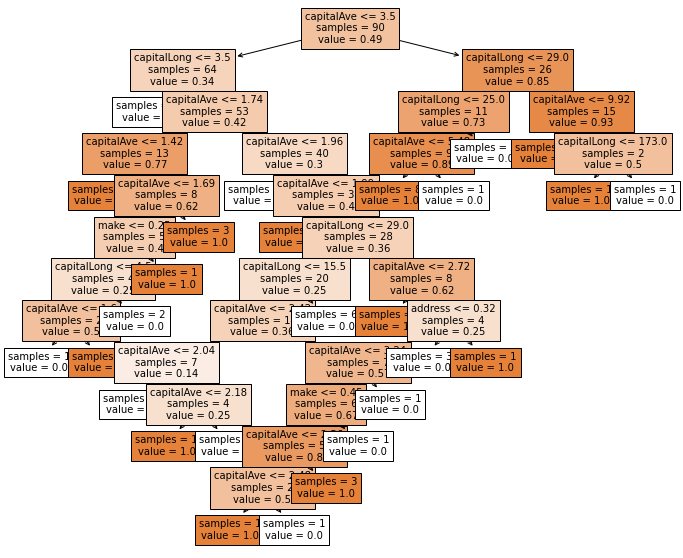

In [10]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 10))

print(f"Profundidad del árbol: {tree_clf.get_depth()}")
print(f"Número de nodos terminales: {tree_clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_clf,
            feature_names = X_train.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [11]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': tree_clf.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
2,capitalAve,0.690755
3,capitalLong,0.232170
0,make,0.043725
1,address,0.033350


### Nivel de profundidad máxima igual a 3

In [12]:
# comparar con los resultados de un arbol de decision------------
tree_clf2 = DecisionTreeRegressor(random_state = 42, max_depth = 3)
tree_clf2.fit(X_train, y_train)
y_pred_tree2 = tree_clf2.predict(X_test);
print("El valor de R^2 es", tree_clf2.score(X_train, y_train))

El valor de R^2 es 0.46210854363028275


Profundidad del árbol: 3
Número de nodos terminales: 7


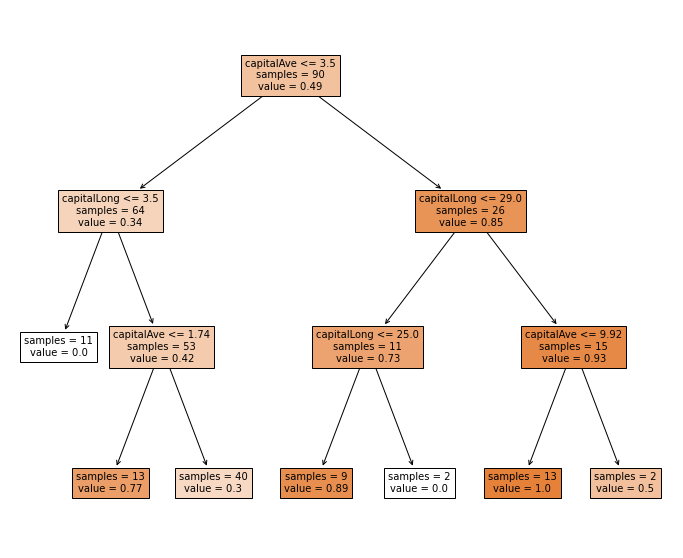

In [13]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 10))

print(f"Profundidad del árbol: {tree_clf2.get_depth()}")
print(f"Número de nodos terminales: {tree_clf2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_clf2,
            feature_names = X_train.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [14]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': tree_clf2.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
2,capitalAve,0.698626
3,capitalLong,0.301374
0,make,0.000000
1,address,0.000000


### Mínimo número de observaciones por nodo hoja igual a 4

In [15]:
# comparar con los resultados de un arbol de decision------------
tree_clf3 = DecisionTreeRegressor(random_state = 42, min_samples_leaf=4)
tree_clf3.fit(X_train, y_train)
y_pred_tree3 = tree_clf3.predict(X_test);
print("El valor de R^2 es", tree_clf3.score(X_train, y_train))

El valor de R^2 es 0.6018139469226425


Profundidad del árbol: 9
Número de nodos terminales: 15


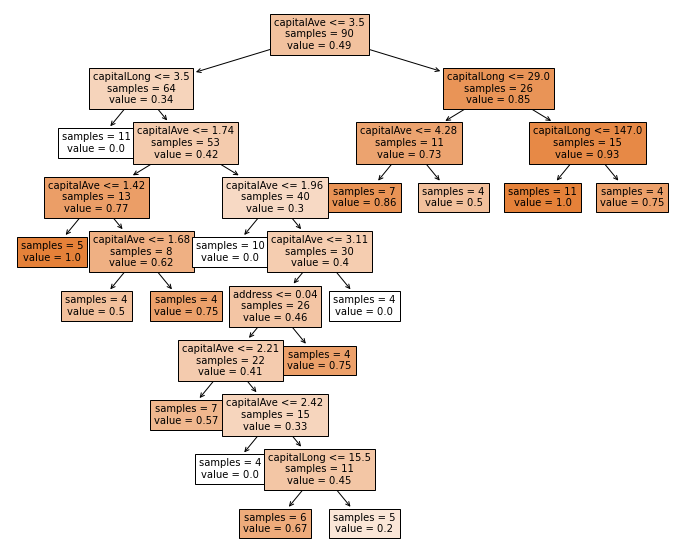

In [16]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 10))

print(f"Profundidad del árbol: {tree_clf3.get_depth()}")
print(f"Número de nodos terminales: {tree_clf3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_clf3,
            feature_names = X_train.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [17]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': tree_clf3.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
2,capitalAve,0.777624
3,capitalLong,0.193312
1,address,0.029064
0,make,0.000000


Elaborado por Jairo Rojas